In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/titanic/train.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
C106           1
A19            1
D7             1
C118           1
E50            1
Name: count, Length: 147, dtype: int64

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Age Visualizations

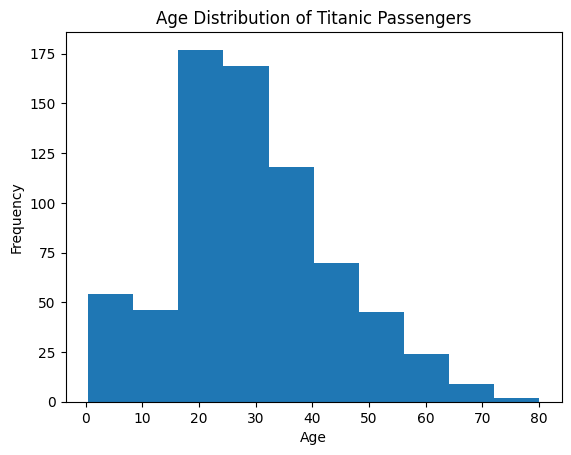

In [8]:
# Age Distribution Plot
df['Age'].hist(grid=False)
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency");

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
# Fill missing values of the Age column by the median
df['Age'].fillna(df['Age'].median(),inplace=True)

/tmp/ipykernel_23/1639828360.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


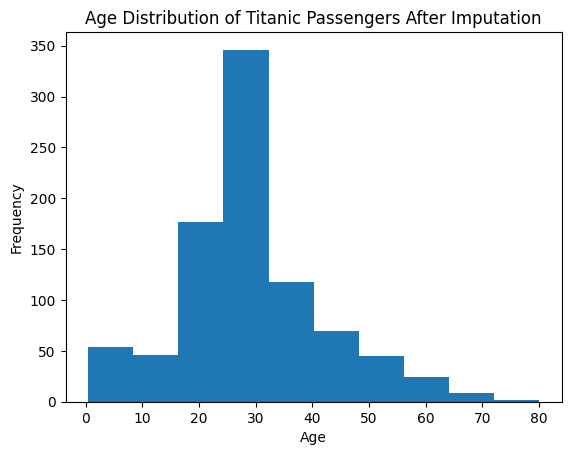

In [11]:
# Age Distribution Plot After Imputation
df['Age'].hist(grid=False)
plt.title("Age Distribution of Titanic Passengers After Imputation")
plt.xlabel("Age")
plt.ylabel("Frequency");

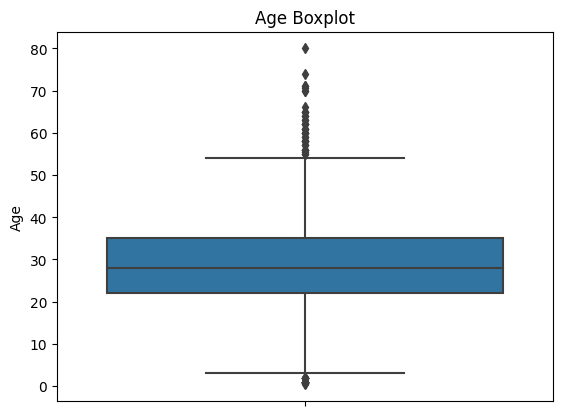

In [12]:
sns.boxplot(y='Age',data=df)
plt.title("Age Boxplot");

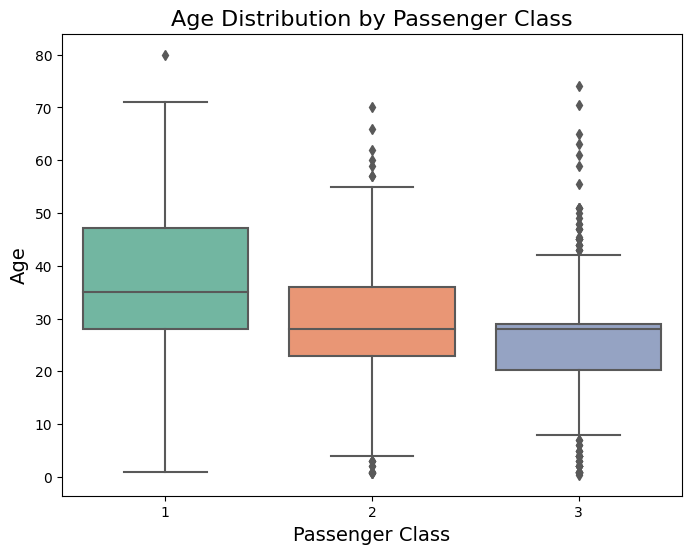

In [13]:
# 1: Upper Class, 2:Middle Class, 3:Lower Class
# Boxplot: Age by passenger class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')
plt.title("Age Distribution by Passenger Class", fontsize=16)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.show()

In [14]:
conditions = [
    (df['Age'] < 18),  
    (df['Age'] >= 18) & (df['Age'] <= 59),  
    (df['Age'] >= 60)  
]
choices = ['Child', 'Adult', 'Senior']
df['Age_Group'] = np.select(conditions, choices, default='Unknown')

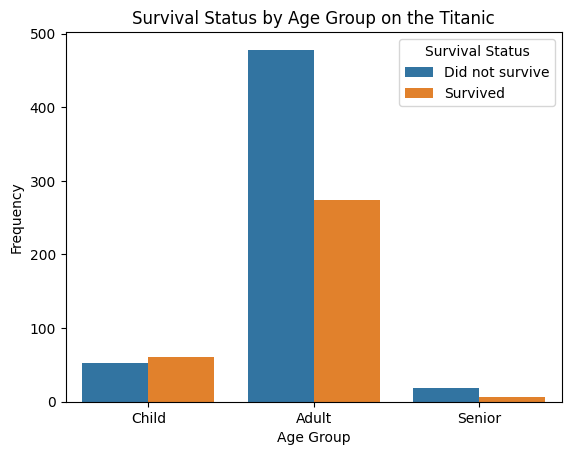

In [15]:
# Plot to show the distribution of Pclass among those who Survived/Died
sns.countplot(x="Age_Group", hue="Survived", data=df,order=['Child', 'Adult', 'Senior'])
plt.xticks(ticks=[0, 1,2], labels=['Child','Adult', 'Senior'])
plt.legend(title='Survival Status', labels=['Did not survive', 'Survived'])
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Survival Status by Age Group on the Titanic");

In [16]:
df.drop(columns=["Age_Group"],inplace=True)

## Dropping column Cabin

In [17]:
# Drop the cabin column as there are too many missing values
df.drop(columns=['Cabin'],axis=1,inplace=True)

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Embarked Visualization

In [19]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [20]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
# Fill or drop?
# Fill missing values of the Embarked column by the mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

/tmp/ipykernel_23/3160318742.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [23]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

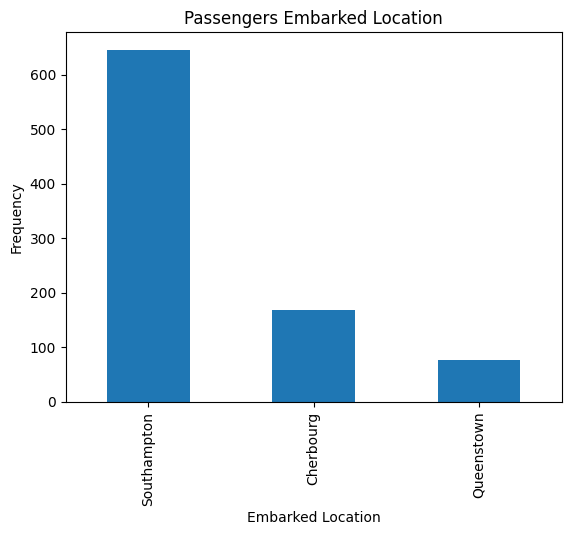

In [24]:
#C = Cherbourg, Q = Queenstown, S = Southampton
loc = {
    "C" : "Cherbourg",
    "Q": "Queenstown",
    "S":"Southampton"
}

df["Embarked"].replace(loc).value_counts().plot(kind="bar")
# df_train['Embarked'].value_counts().plot(kind="bar")
plt.title("Passengers Embarked Location")
plt.xlabel("Embarked Location")
plt.ylabel("Frequency");

In [25]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [26]:
# Convert age to integer datatype
#df_train['Age'] = df_train['Age'].astype('int')

## Siblings/Spouses Visualization

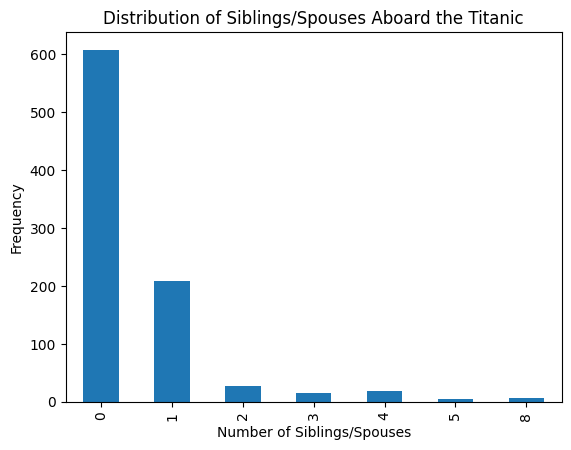

In [27]:
# Visualizing number of siblings and spouses
df['SibSp'].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Frequency")
plt.title("Distribution of Siblings/Spouses Aboard the Titanic");

## Parents/Children Visualization

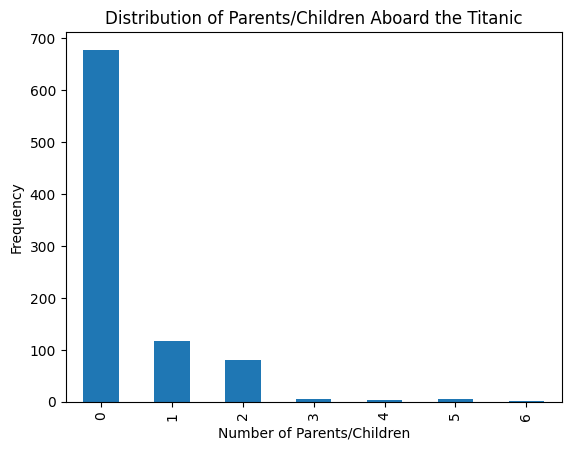

In [28]:
# Visualizing number of parents and children
df['Parch'].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Number of Parents/Children")
plt.ylabel("Frequency")
plt.title("Distribution of Parents/Children Aboard the Titanic");

## Dropping Column Ticket

In [29]:
# Drop the Ticket column as it holds no significance
df.drop(columns=['Ticket'],inplace=True)

## Gender Distribution among Survived/Died

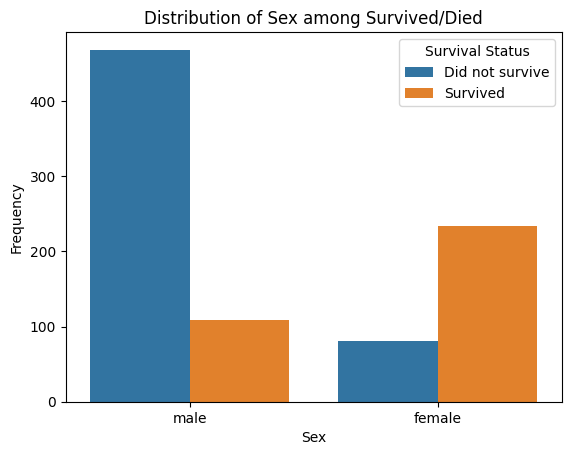

In [30]:
# Plot to show the distribution of Sex among those who Survived/Died
sns.countplot(x="Sex", hue="Survived", data=df)
plt.xticks(ticks=[0, 1], labels=['male','female'])
plt.legend(title='Survival Status', labels=['Did not survive', 'Survived'])
plt.title("Distribution of Sex among Survived/Died")
plt.xlabel("Sex")
plt.ylabel("Frequency");

In [31]:
df.groupby('Sex')['Survived'].value_counts()

Sex  Survived
0    0           468
     1           109
1    1           233
     0            81
Name: count, dtype: int64

## Passenger Class Distribution among Survived/Dead

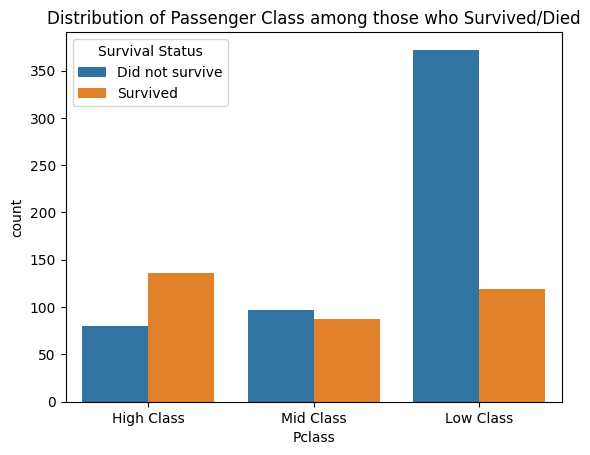

In [32]:
# Plot to show the distribution of Pclass among those who Survived/Died
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.xticks(ticks=[0, 1,2], labels=['High Class','Mid Class','Low Class'])
plt.legend(title='Survival Status', labels=['Did not survive', 'Survived'])
plt.title("Distribution of Passenger Class among those who Survived/Died");

In [33]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [34]:
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

## Ticket Prices Visualization

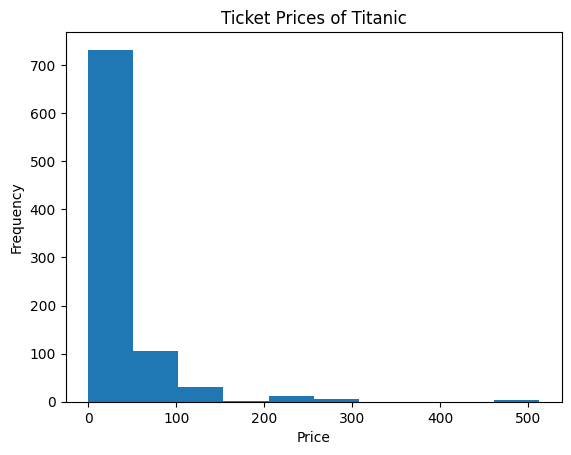

In [35]:
#Ticket Fare
df["Fare"].hist(grid=False)
plt.title("Ticket Prices of Titanic")
plt.xlabel("Price")
plt.ylabel("Frequency");

## Coorelation between numeric columns

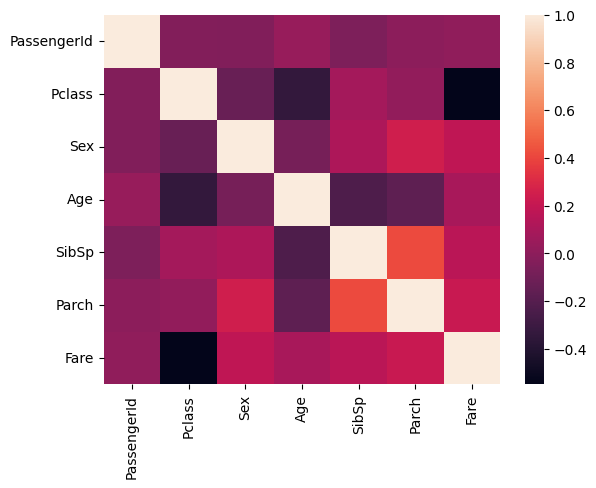

In [36]:
target = "Survived"
# Checking coorelation among the data
corr = df.drop(columns=target).select_dtypes(exclude="object").corr()
sns.heatmap(corr);

## Class Balance

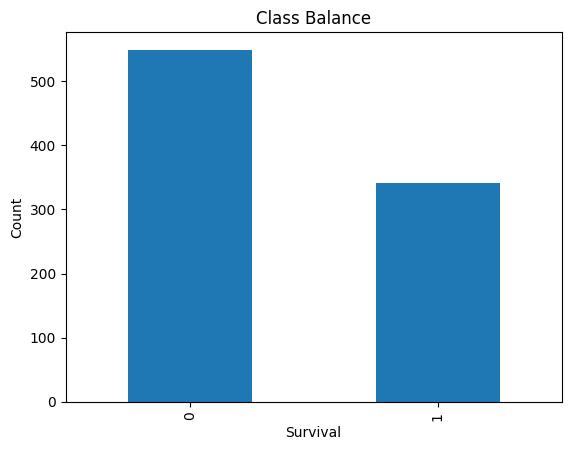

In [37]:
# Class Balance
df["Survived"].value_counts().plot(kind="bar")
plt.xlabel("Survival")
plt.ylabel("Count")
plt.title("Class Balance")
plt.show();

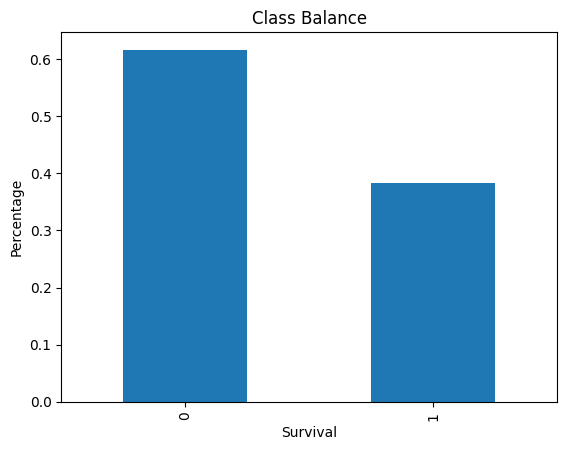

In [38]:
# Class Balance
df["Survived"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Survival")
plt.ylabel("Percentage")
plt.title("Class Balance")
plt.show();